## 1. Import Libraries

In [1]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [52]:
df = pd.read_csv('Mumbai_Property.csv')
df.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0,588235.2941
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0,282352.9412
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0,111764.7059
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0,441176.4706
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0,411764.7059


### 2.1 Know more about dataset

In [53]:
df.shape

(2580, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Type      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
 12  USD            2580 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 262.2+ KB


In [55]:
df.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39,205164.48
std,2287.13,40760.88,8.10,0.84,0.75,369.48,434687.52
min,33.57,84.00,0.00,1.00,1.00,13.00,15294.12
25%,630.75,8791.75,3.00,1.00,2.00,67.00,78823.53
50%,850.00,13785.00,6.00,2.00,2.00,111.50,131176.47
75%,1156.00,22650.00,12.00,2.00,2.00,200.00,235294.12
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00,19411764.71


In [56]:
Q1 = np.quantile(df.Area_SqFt,0.02)
Q3 = np.quantile(df.Area_SqFt,0.98)
med = np.median(df.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = df.Area_SqFt[(df.Area_SqFt <= lower_bound) | (df.Area_SqFt >= upper_bound)]

df = df.drop(outliers1.index).reset_index(drop=True)

In [57]:
Q1 = np.quantile(df.Rate_SqFt,0.02)
Q3 = np.quantile(df.Rate_SqFt,0.80)
med = np.median(df.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = df.Rate_SqFt[(df.Rate_SqFt <= lower_bound) | (df.Rate_SqFt >= upper_bound)]

df = df.drop(outliers1.index).reset_index(drop=True)

In [58]:
df.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27,189734.02
std,486.53,10192.02,7.98,0.83,0.73,162.12,190724.30
min,185.00,1808.00,0.00,1.00,1.00,13.00,15294.12
25%,634.25,8762.25,3.00,1.00,2.00,66.25,77941.18
50%,850.00,13629.50,6.00,2.00,2.00,110.00,129411.76
75%,1150.00,22278.75,12.00,2.00,2.00,196.75,231470.59
max,5000.00,55611.00,55.00,6.00,7.00,1900.00,2235294.12


In [59]:
df.duplicated().sum()

7

In [60]:
df = df.drop_duplicates(ignore_index=True)

In [61]:
df.isna().sum()

,0
Property_Name,0
Location,0
Region,0
Property_Age,0
Availability,0
Area_Type,0
Area_SqFt,0
Rate_SqFt,0
Floor_No,0
Bedroom,0


In [62]:
df.shape

(2531, 13)

In [63]:
df.to_csv('Final_Project.csv', index_label = False)
df = pd.read_csv('Final_Project.csv')
df.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Type,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0,588235.2941
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0,282352.9412
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0,111764.7059
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0,441176.4706
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0,411764.7059


## 3. Data Visualization

### 3.1 Set the rcParams for all next Visualization

In [64]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

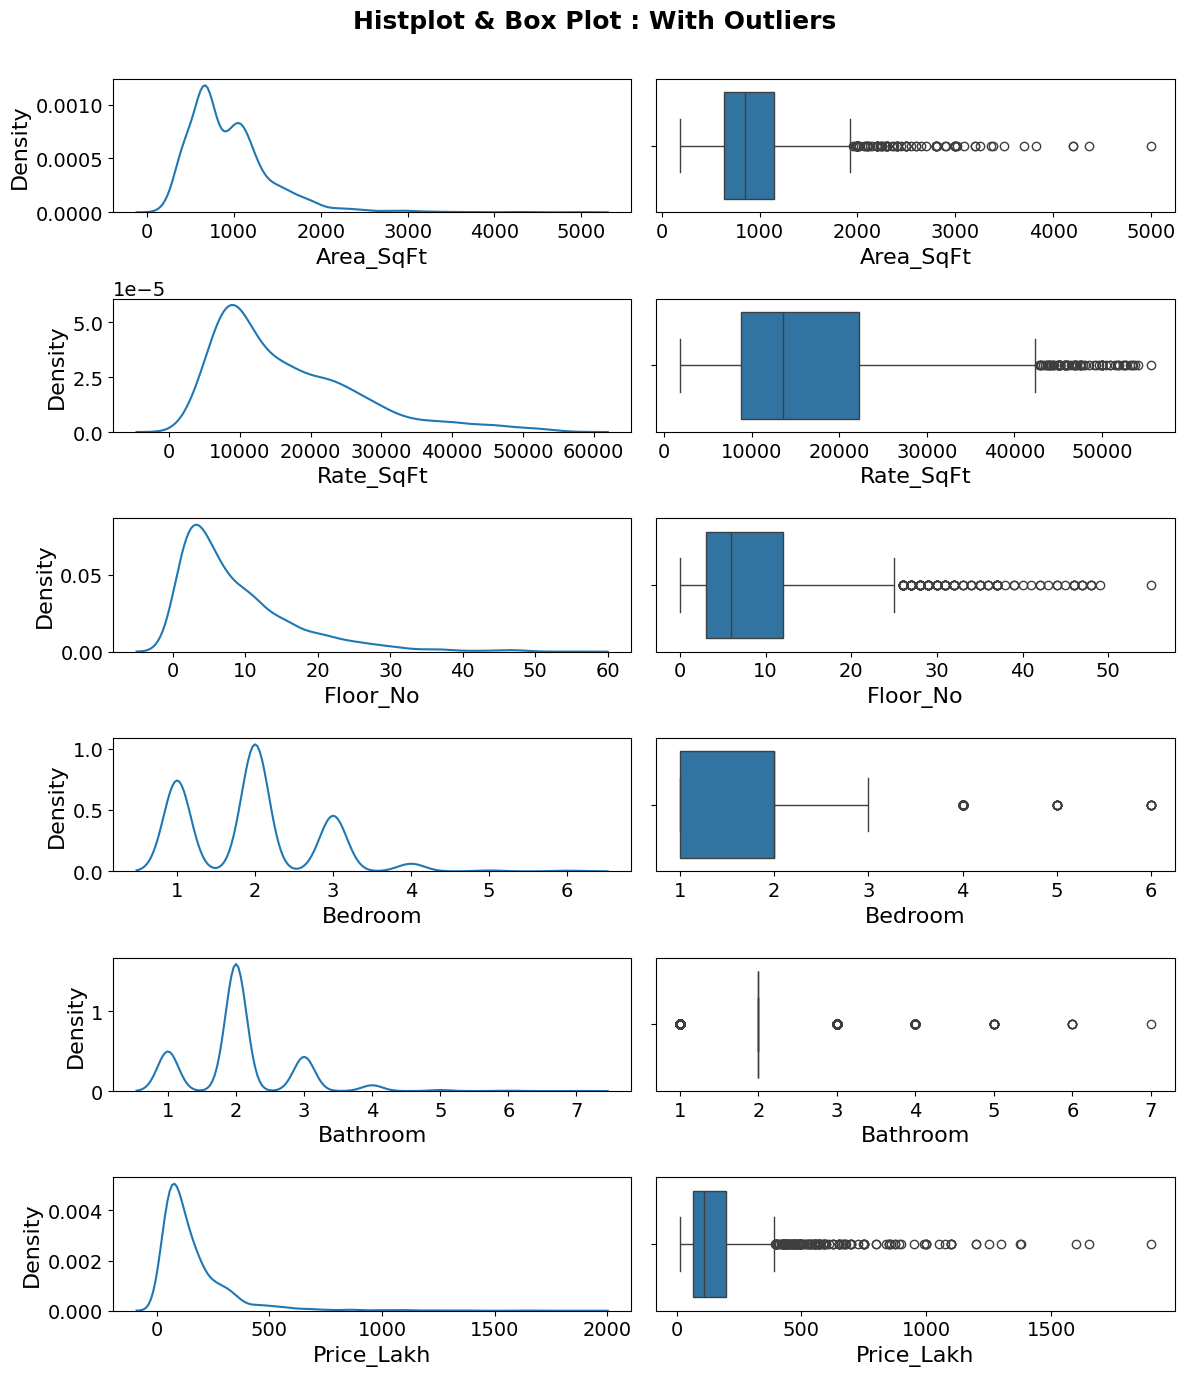

In [65]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = df, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = df, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = df, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = df, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = df, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = df, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = df, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = df, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = df, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = df, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = df, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = df, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

## 4. Heatmap

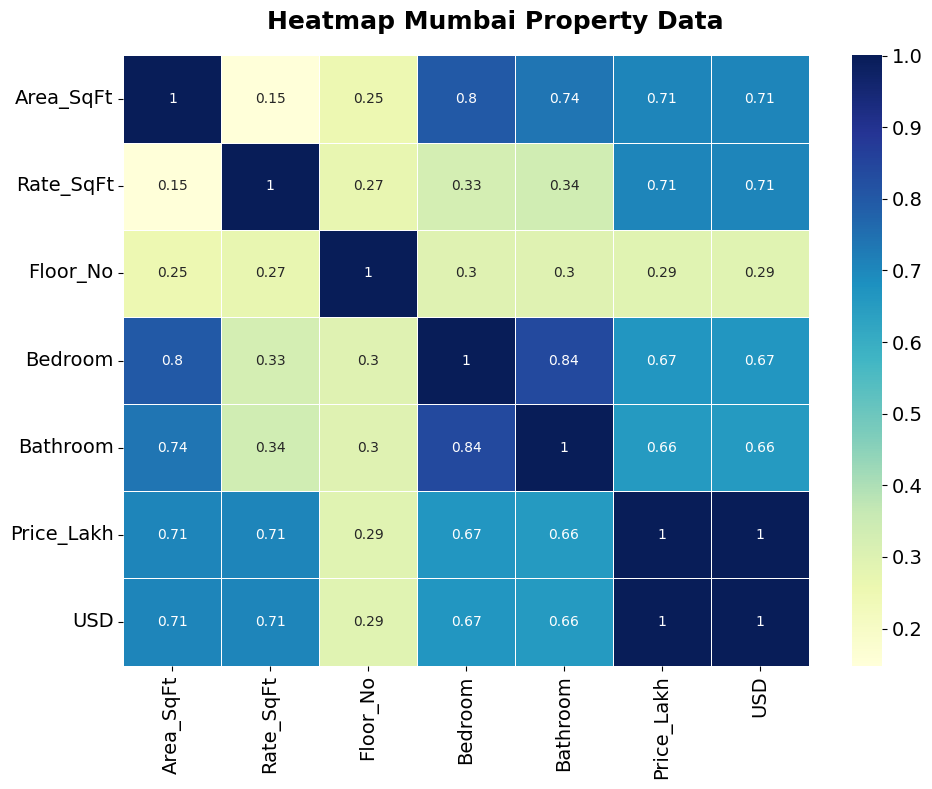

In [66]:
# Select only the numeric columns before calculating the correlation.
numerical_df = df.select_dtypes(include=['number'])

fig = plt.figure(figsize=(10,8))

sns.heatmap(numerical_df.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Heatmap', dpi = 250)

## 5. Exploratory Data Analysis
    Convert all variable into following categories

    1 Binary Variables
    2 Ordinal Varibles
    3 Continous Data
    4 Target Variable

### 5.1 Checking for Binary, Oridinal, Continous Data & Target Column

In [67]:
num_columns = df.describe().columns
categorical_cols = df.describe(include= 'object').columns

In [68]:
df.nunique()

,0
Property_Name,894
Location,1294
Region,145
Property_Age,5
Availability,2
Area_Type,4
Area_SqFt,696
Rate_SqFt,1990
Floor_No,51
Bedroom,6


In [69]:
binary_variables = [i  for i in df.columns  if (len(df[i].unique()) == 2)]

In [70]:
binary_variables

['Availability']

In [71]:
ordinal_variables=[i for i in df.columns if ((len(df[i].unique()) > 2 ) and (len(df[i].unique()) <= 53))]

In [72]:
ordinal_variables

['Property_Age', 'Area_Type', 'Floor_No', 'Bedroom', 'Bathroom']

In [73]:
continous_variable = [i for i in df.columns if ((len(df[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data

In [74]:
continous_variable

['Area_SqFt', 'Rate_SqFt', 'Price_Lakh']

In [75]:
target_variable = 'USD'

In [76]:
target_variable

'USD'

## 6. Binary Variable

In [77]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


### 6.1 Availability Count

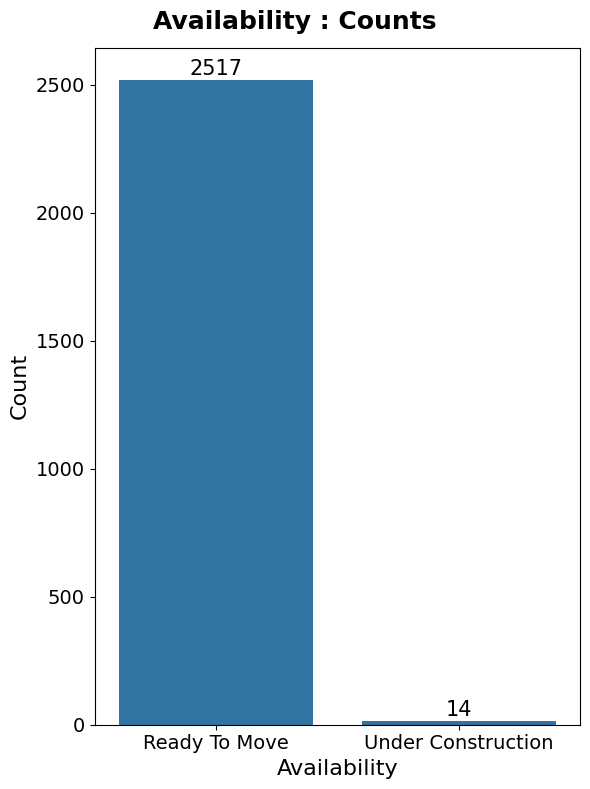

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

fig = plt.figure(figsize=(6,8))

# Calculate value counts for Availability
availability_counts = df.Availability.value_counts()

# Use the calculated counts for plotting
plot = sns.barplot(x=availability_counts.index,
                   y=availability_counts.values)

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width()/2, bar.get_height()),
                  ha='center', va='center', size=15, xytext=(0,8),
                  textcoords='offset points')

fig.suptitle('Availability : Counts',fontsize=18, fontweight="bold")
plt.xlabel('Availability')
plt.ylabel('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Availability_Bar', dpi = 500)

## 7. Ordinal Variables

In [79]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Property_Age', 'Area_Type', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 5


### 7.1 Price with respect to Property Age

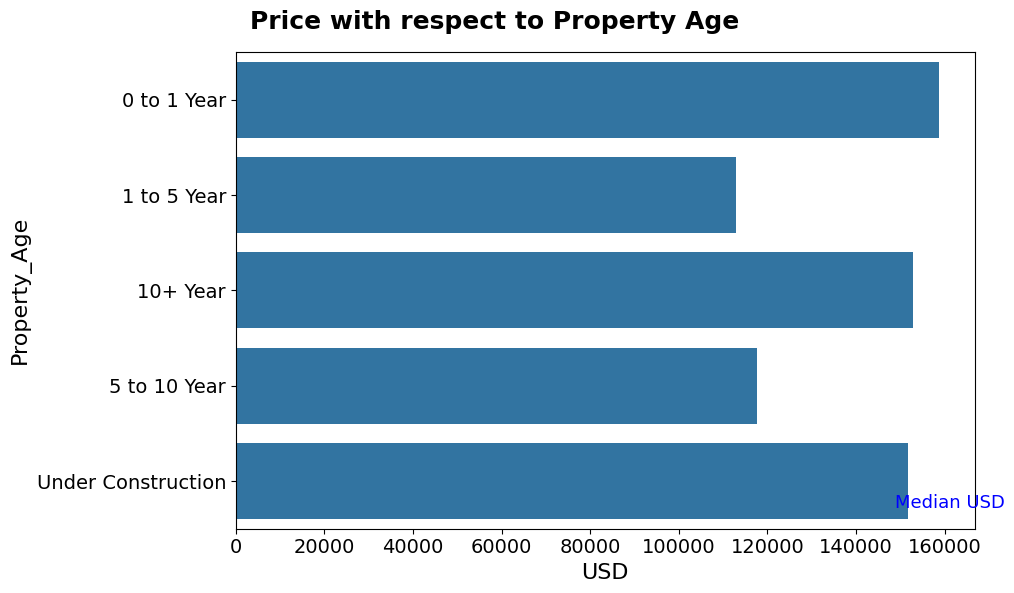

In [80]:
fig = plt.figure(figsize=(10,6))

# Calculate the median USD based on 'Property_Age' for the x-axis
x_values = df.groupby('Property_Age')['USD'].median()

# Use the index (Property_Age values) as the y-axis
sns.barplot(x=x_values, y=x_values.index)

fig.suptitle('Price with respect to Property Age', fontsize=18, fontweight="bold")
# Added the 's' argument with the desired text string
fig.text(0.9, 0.15, 'Median USD', fontsize=13, color='blue')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

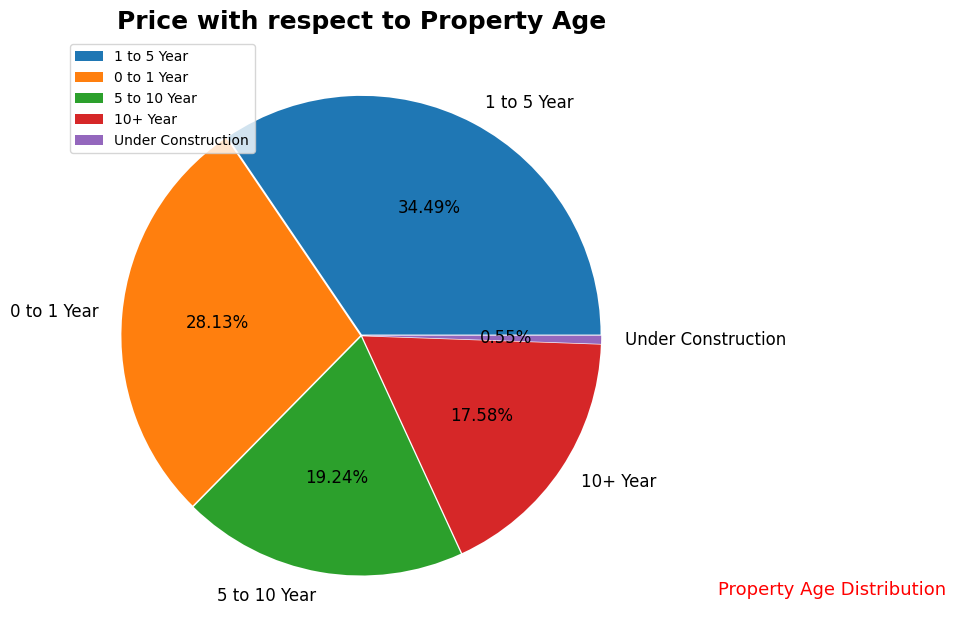

In [81]:
fig = plt.figure(figsize = (8,8))
plt.pie(df['Property_Age'].value_counts(),
       labels=['1 to 5 Year','0 to 1 Year','5 to 10 Year','10+ Year','Under Construction'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Price with respect to Property Age", fontsize = 18, fontweight = 'bold')
# Added the 's' argument to specify the text to be displayed
fig.text(0.9, 0.15, 'Property Age Distribution', fontsize=13, color='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Age_Distribution', dpi = 500)

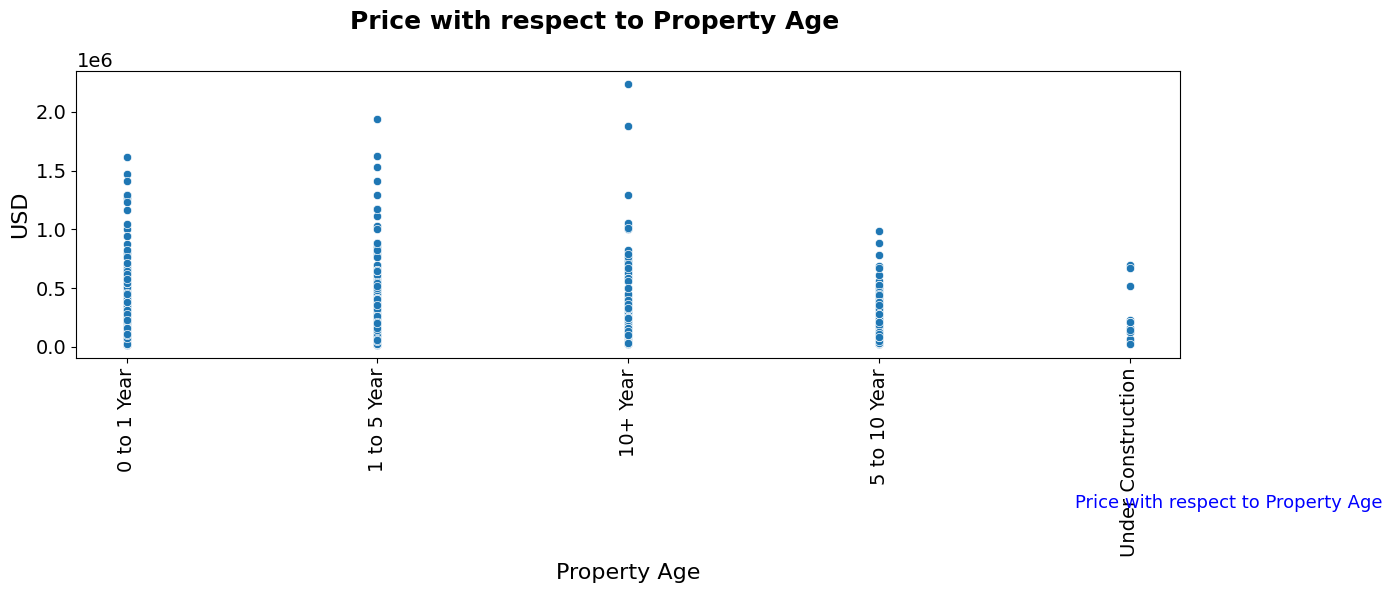

In [82]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
# Added the 's' argument with the desired text string
fig.text(0.9, 0.15, 'Price with respect to Property Age', fontsize = 13, color ='blue')


sns.scatterplot(data = df , x = df['Property_Age'], y = df['USD'])
plt.xlabel("Property Age", size=16)
plt.ylabel("USD", size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Scatter', dpi = 500)

### 7.2 Price with respect to Bed & Bath

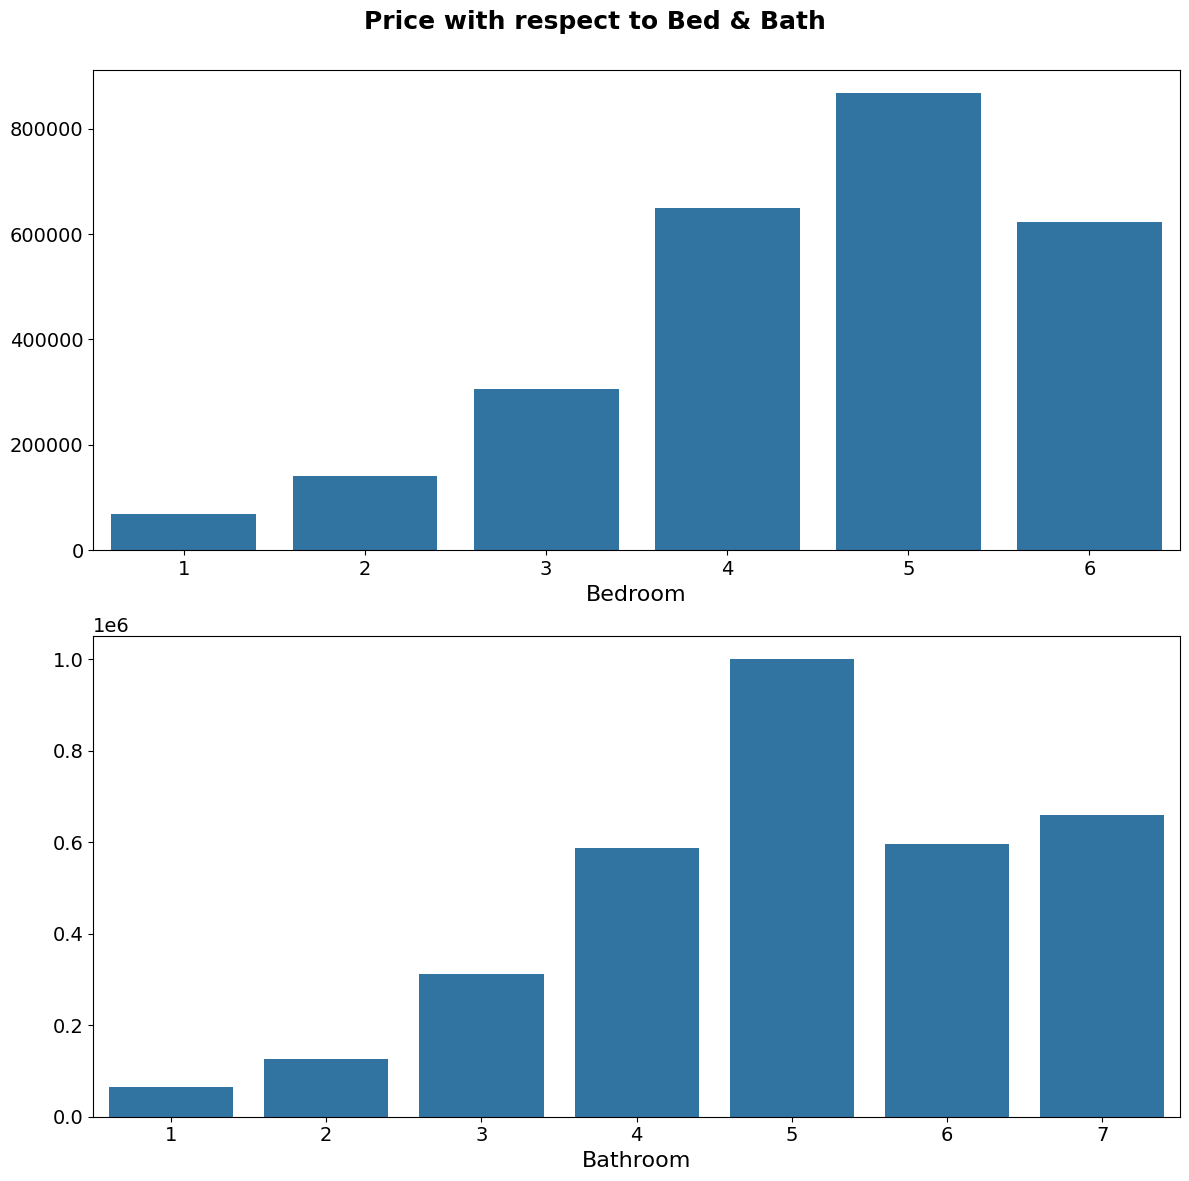

In [83]:
fig, ax = plt.subplots(2,1, figsize = (12,12))

# Calculate the median USD based on 'Bedroom' and 'Bathroom' separately
bedroom_median = df.groupby('Bedroom')['USD'].median()
bathroom_median = df.groupby('Bathroom')['USD'].median()

# Use the calculated medians directly for plotting
# Removed 'data=df' and use pre-calculated medians for x and y
sns.barplot(ax=ax[0], x=bedroom_median.index, y=bedroom_median.values)
sns.barplot(ax=ax[1], x=bathroom_median.index, y=bathroom_median.values)

fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
# Removed empty fig.text call to avoid error

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

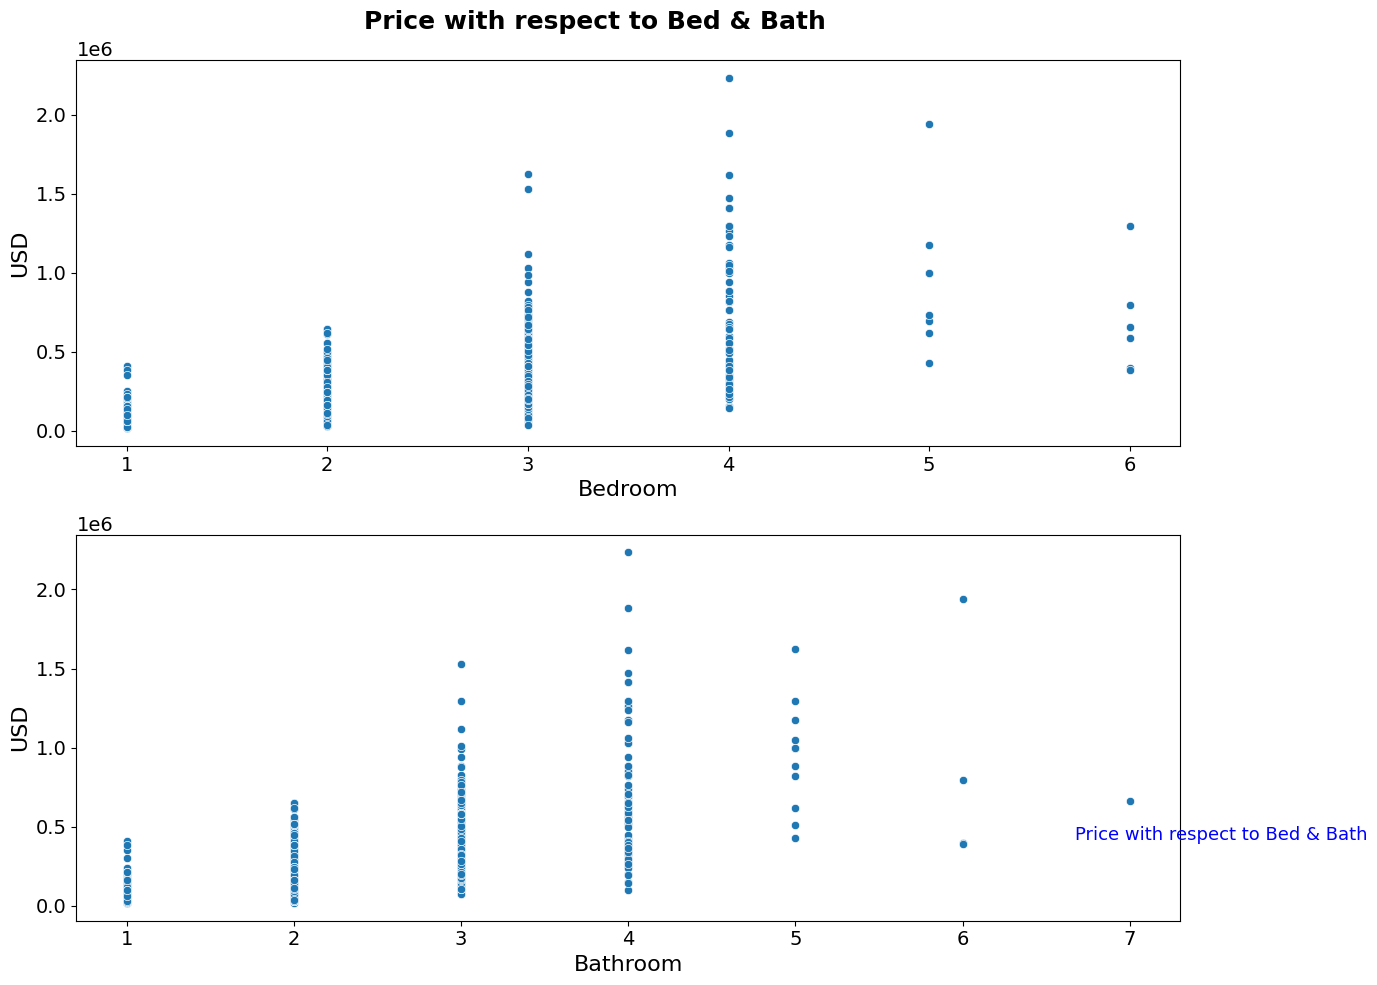

In [84]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = df , x = df['Bedroom'], y = df['USD'])
sns.scatterplot(ax= ax[1], data = df , x = df['Bathroom'], y = df['USD'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
# Added the 's' argument to specify the text to be displayed
fig.text(0.9, 0.15, 'Price with respect to Bed & Bath', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

### 7.3 Area Type Distribution

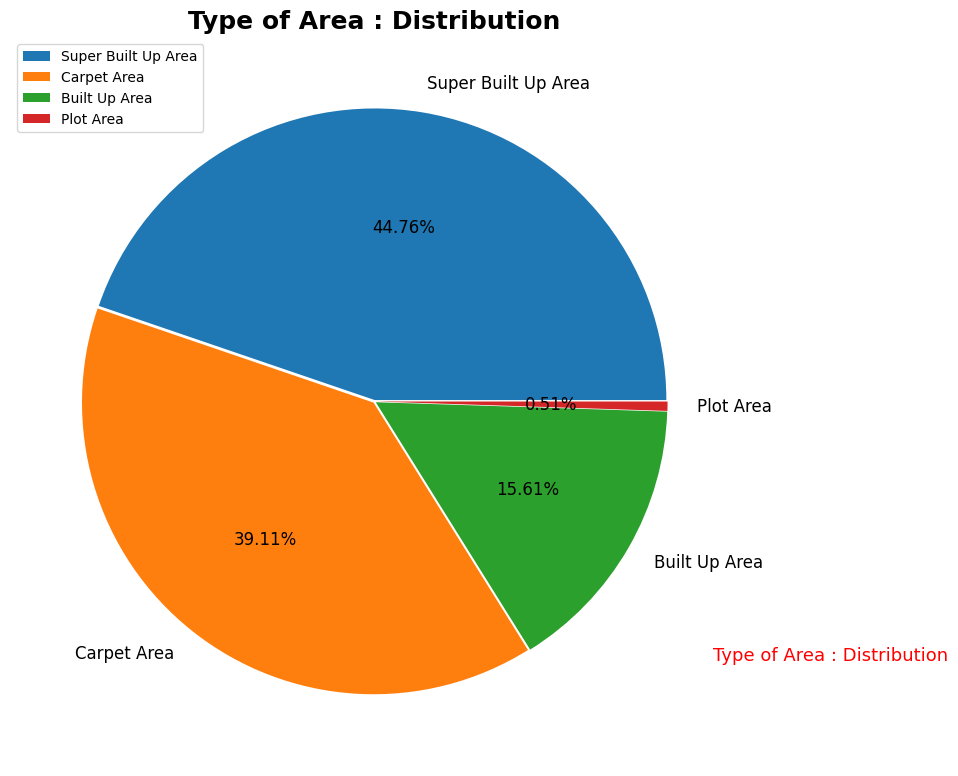

In [86]:
fig = plt.figure(figsize = (8,8))
plt.pie(df['Area_Type'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
# Added the 's' argument to specify the text to be displayed
fig.text(0.9, 0.15, 'Type of Area : Distribution', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Area_Type_Distribution', dpi = 500)

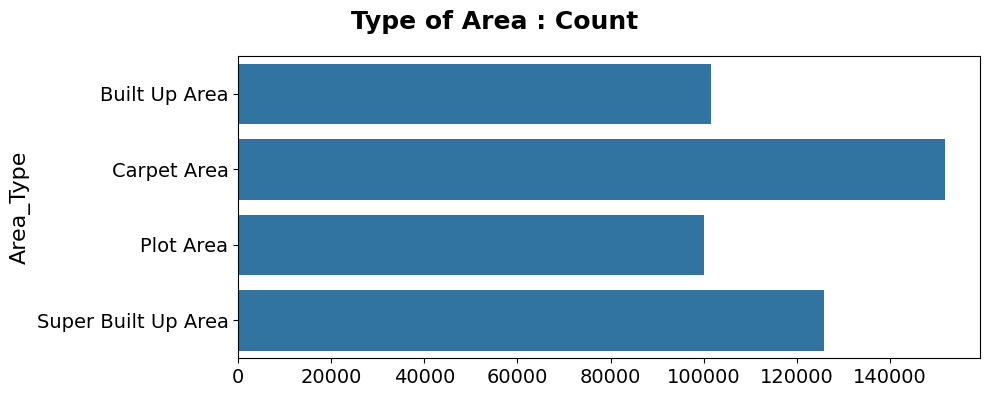

In [88]:
fig = plt.figure(figsize=(10,4))

# Ensure 'USD' column is numeric
df['USD'] = pd.to_numeric(df['USD'], errors='coerce')

# Calculate median USD for each Area_Type
area_type_median = df.groupby('Area_Type')['USD'].median()

# Use the calculated medians for plotting
sns.barplot(x=area_type_median.values, y=area_type_median.index)

fig.suptitle('Type of Area : Count', fontsize= 18, fontweight="bold")
# Removed the unnecessary fig.text call
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### 7.4 Price with respect to Floor Numbers

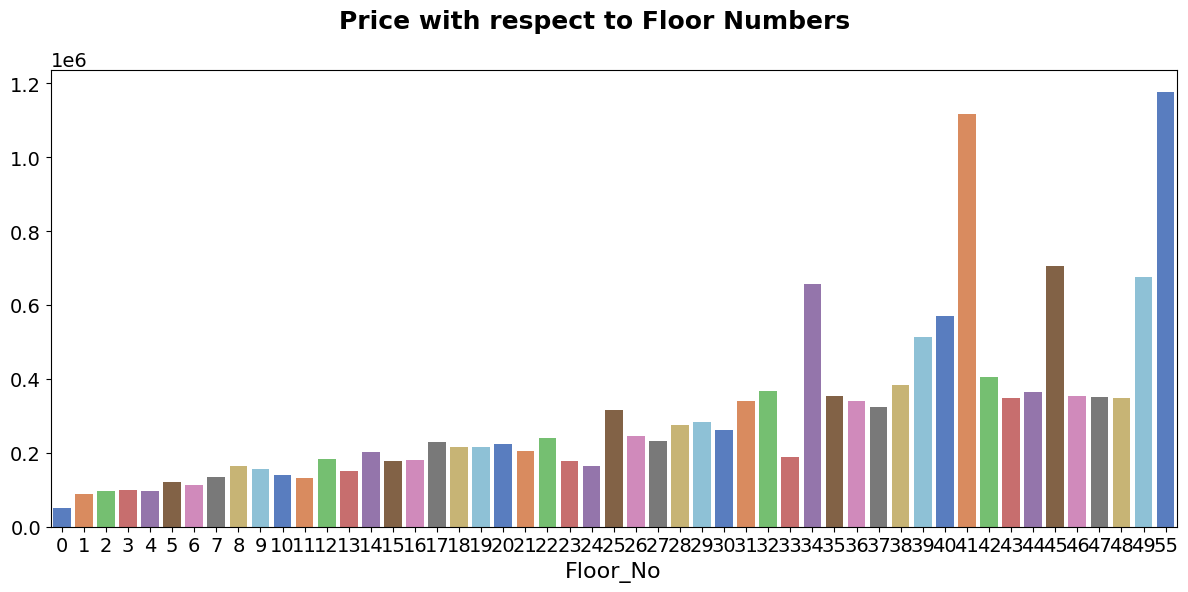

In [90]:
fig = plt.figure(figsize=(12,6))
params = {'xtick.labelsize':'8','ytick.labelsize':'14','axes.labelsize':'16'}

# Convert 'Floor_No' to numeric if it contains string representations of numbers or levels
# For example, replace 'Ground' with 0, 'Upper Basement' with -1, etc.
# df['Floor_No'] = pd.to_numeric(df['Floor_No'], errors='coerce')  # This line might require adjustments depending on your data

# Filter out non-numeric values from 'Floor_No' before grouping:
numeric_floors = df[pd.to_numeric(df['Floor_No'], errors='coerce').notnull()]

# Calculate the median USD for each numeric Floor_No
floor_median = numeric_floors.groupby('Floor_No')['USD'].median()

# Use the calculated medians for plotting
sns.barplot(x=floor_median.index, y=floor_median.values, palette='muted')

fig.suptitle('Price with respect to Floor Numbers', fontsize=18, fontweight="bold")
# fig.text(0.9, 0.15, fontsize=13, color='blue')  # This line was causing an error as well, so I've commented it out for now
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Floor_Numbers_Bar', dpi=500)


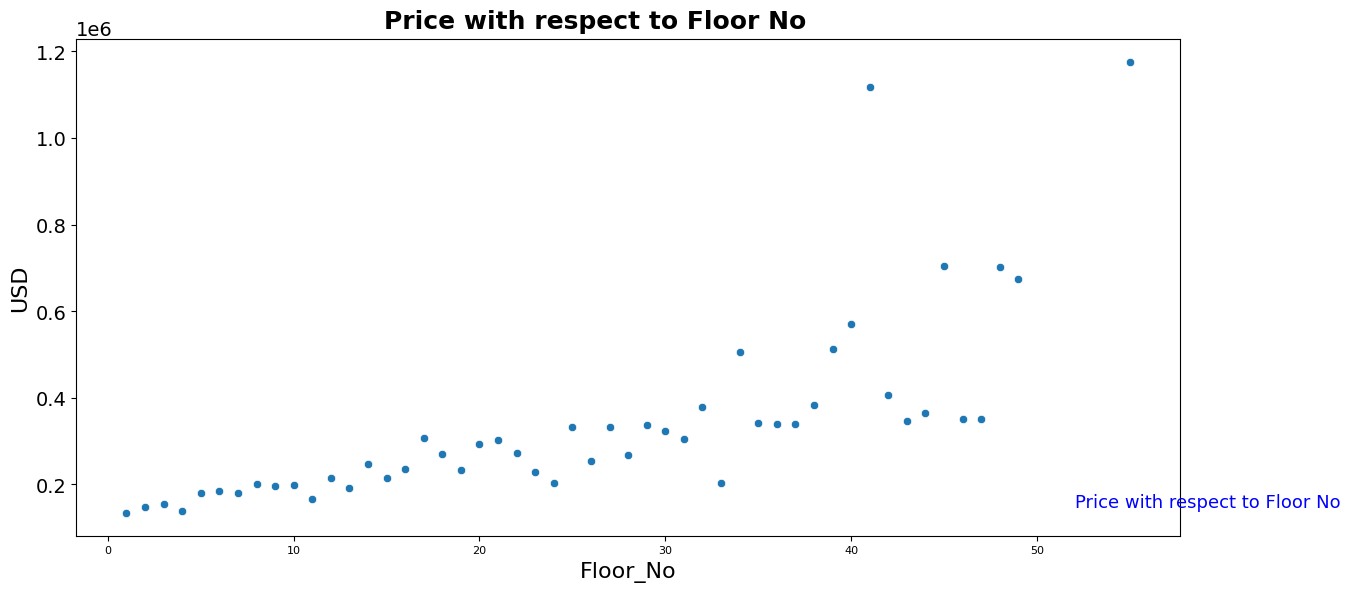

In [92]:
fig = plt.figure(figsize=(12,6))

group_full = df.groupby('Floor_No')['USD'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y = group['USD']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
# Added the 's' argument to specify the text to be displayed
fig.text(0.9, 0.15, 'Price with respect to Floor No', fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('FloorNo_Price_Scatter', dpi = 500)

### From above visualization we have concluded following points for higher Price.

   1. As number of bedroom increased price also has incresed
   2. As floor number goes higher price also increased
   3. 4 BHK and 5 BHK price higher
   4. Plot Area criteria is higher price
   5. Upcoming New Project prices are higher

## 8. Continous Variables

In [93]:
for i in continous_variable:
    print("Length of", i,":", len(df[i].unique()))

Length of Area_SqFt : 696
Length of Rate_SqFt : 1990
Length of Price_Lakh : 467


### 8.1 Price with respect to SqFt Area

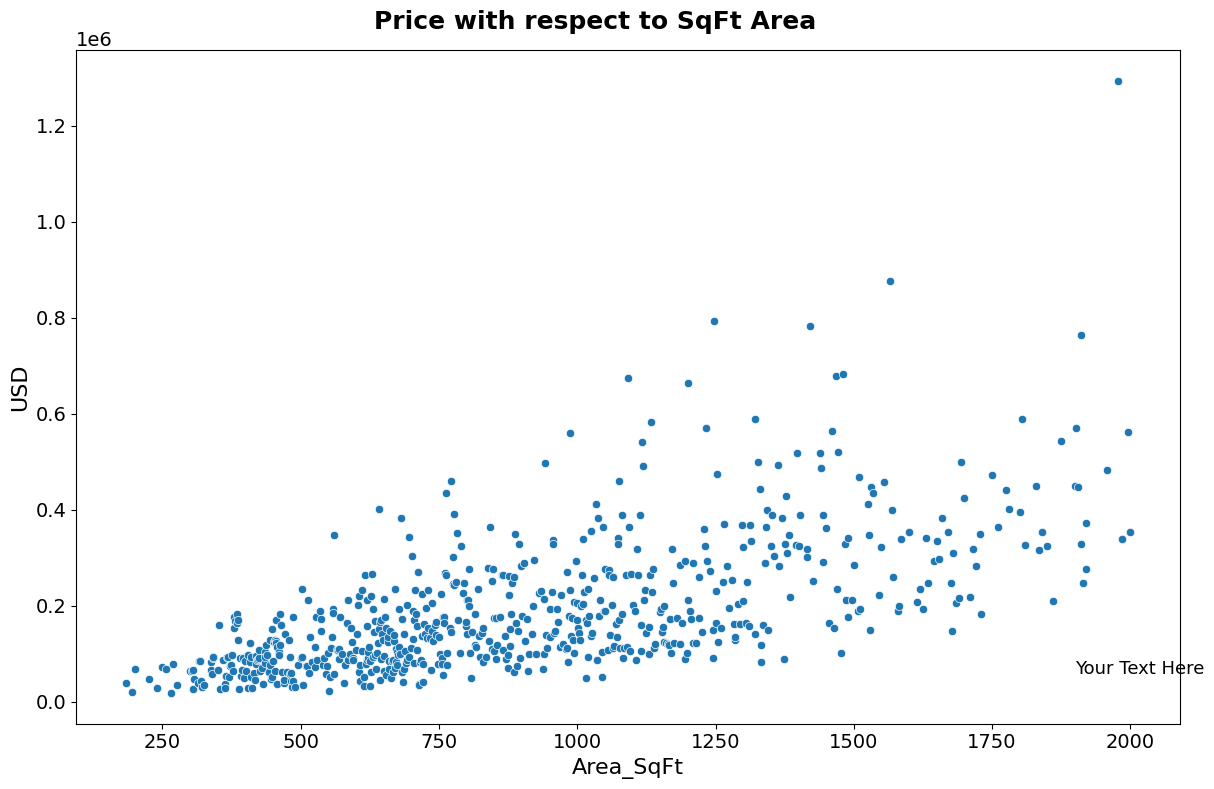

In [97]:
fig = plt.figure(figsize=(12,8))

group_full = df.groupby('Area_SqFt')['USD'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y = group['USD']
fig.suptitle('Price with respect to SqFt Area', fontsize= 18 , fontweight='bold')
# Added the 's' argument to fig.text() to specify the text to be displayed
fig.text(0.9, 0.15, 'Your Text Here', fontsize = 13, color ='black') # Replace 'Your Text Here' with the desired text
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

### 8.2 Data visualization for 'Rate_SqFt' for Location 'Mira Road'
**Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here**

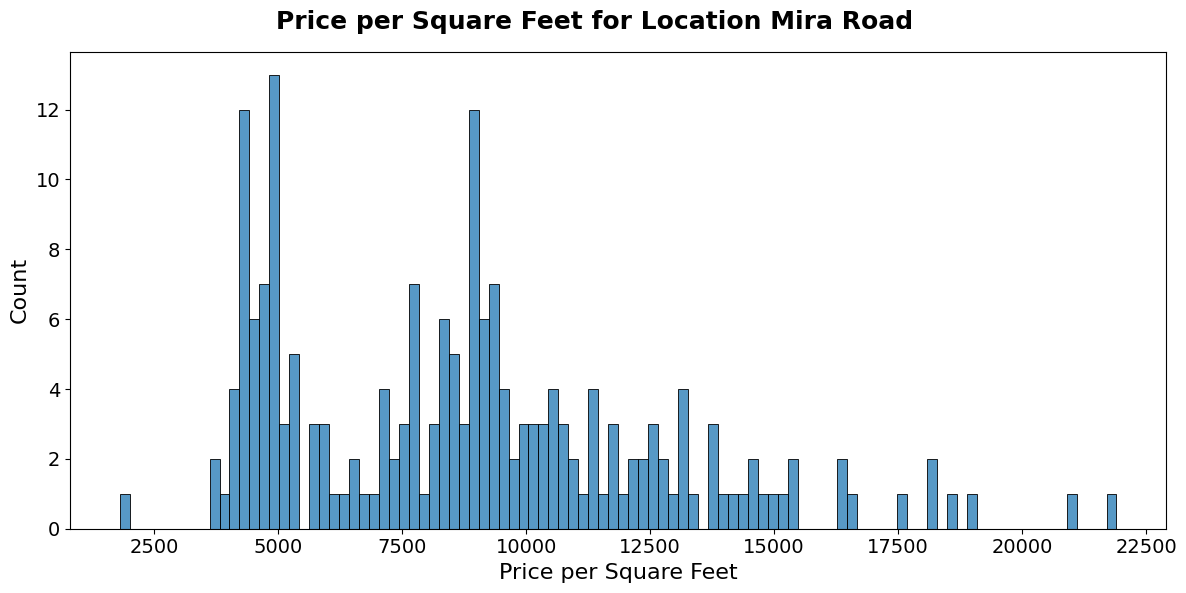

In [101]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price per Square Feet for Location Mira Road', size = 18, fontweight="bold")
# Added the 's' argument to fig.text() to specify the text to be displayed

sns.histplot(df[df.Region == "Mira Road"].Rate_SqFt ,bins=100)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Rate_SqFt_Bar', dpi = 500)

## 9. Target Varible

In [102]:
df['Price_Cat'] = pd.cut(x = df['USD'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
df.Price_Cat.value_counts()

,count
Price_Cat,
High,2
Low,0
Medium,0


### Checking for Imbalanced or balanced dataset with regards to the Target

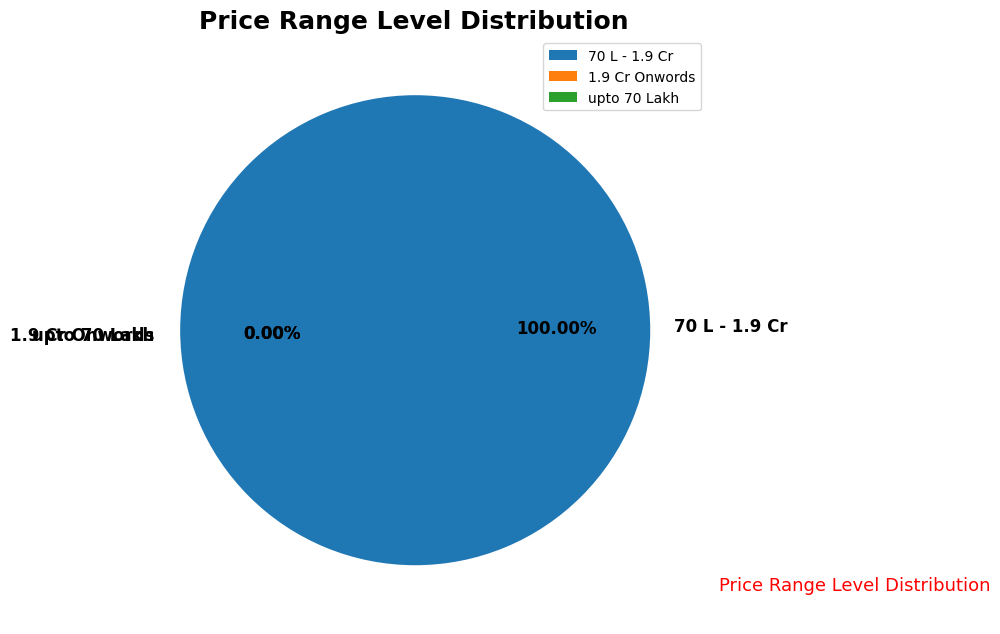

In [105]:
fig = plt.figure(figsize = (8,8))

plt.pie(df['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Price Range Level Distribution', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Range_Distribution', dpi = 500)

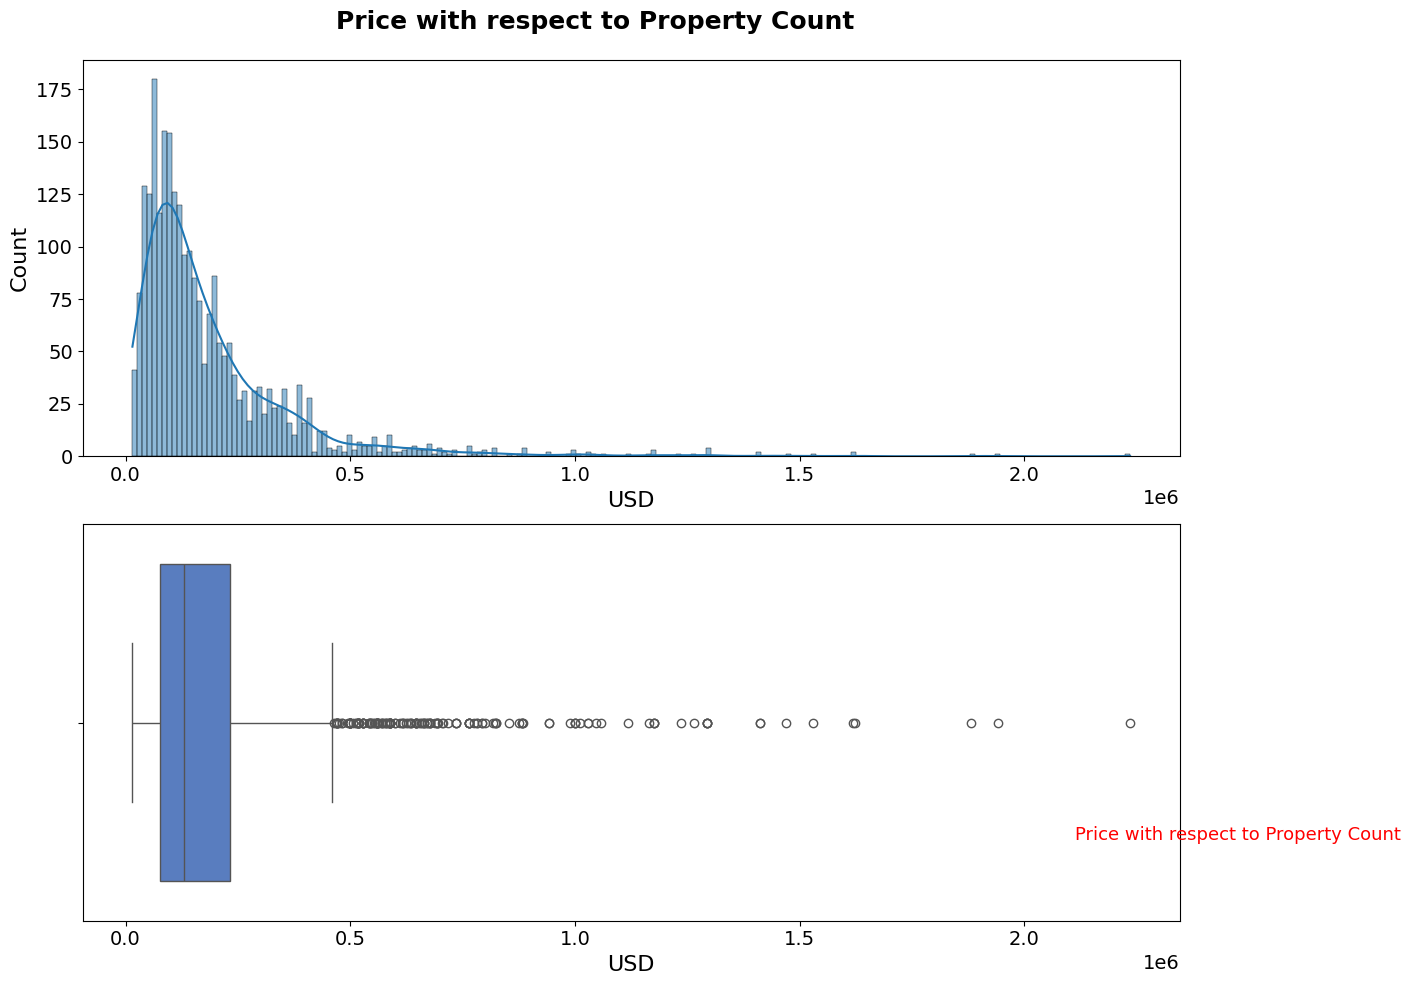

In [107]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
# Providing the text string 'Price with respect to Property Count' as the third argument to fig.text()
fig.text(0.9, 0.15, 'Price with respect to Property Count', fontsize = 13, color ='red')
sns.histplot(ax= ax[0],data=df["USD"], kde =  True, bins = 200)
sns.boxplot(ax= ax[1], data=df["USD"], orient="h", palette='muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

In [108]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

x = df['Region']
y = df['USD']

plot = px.Figure(data=[px.Bar(x=x, y=y)])
plot.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,stepmode="backward")])),
                              rangeslider=dict(visible=True)),width=900, height=900)

plot.show()

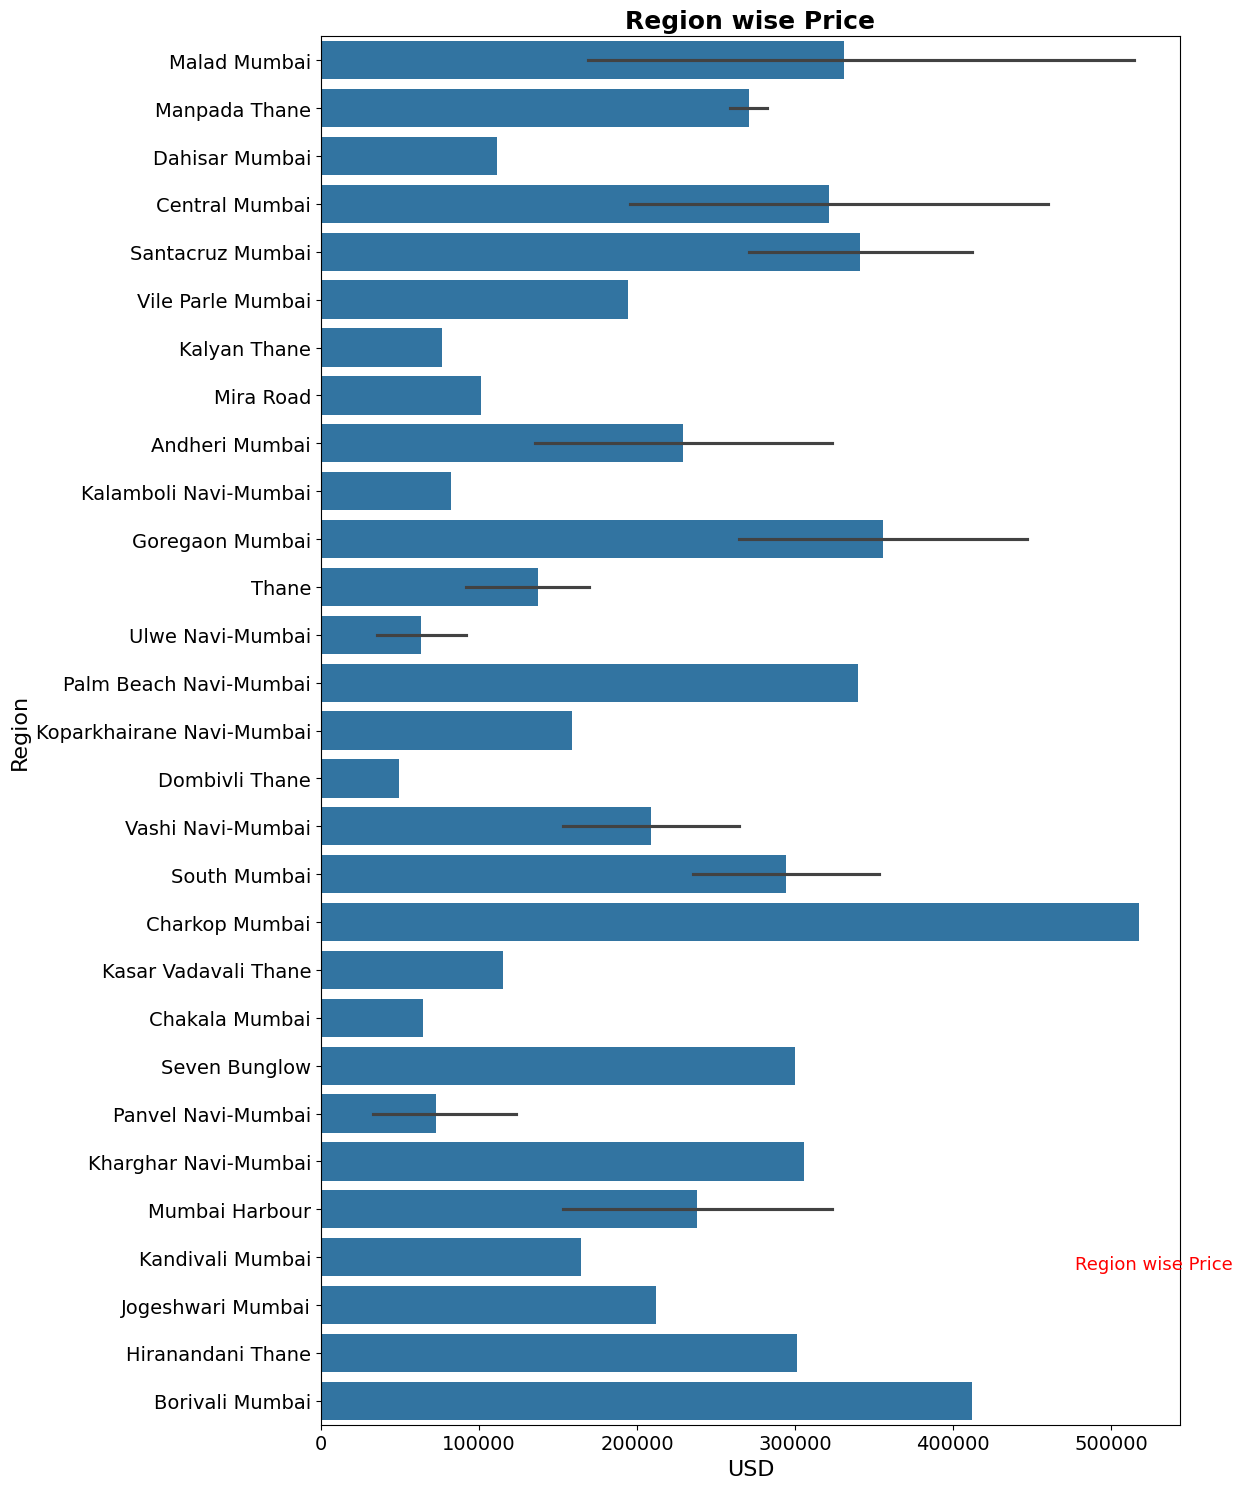

In [111]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='USD',y='Region',data=df.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
# Providing the text string 'Region wise Price' as the third argument to fig.text()
fig.text(0.9, 0.15, 'Region wise Price', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Region_wise_Price_Bar', dpi = 500)

## 11. Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [112]:
df.Region.nunique()

145

In [115]:
def plot_scatter_chart1(df, Region):
    fig = plt.figure(figsize=(10, 7))
    bhk2 = df[(df.Region == Region) & (df.Bedroom == 2)]
    bhk3 = df[(df.Region == Region) & (df.Bedroom == 3)]
    bhk4 = df[(df.Region == Region) & (df.Bedroom == 4)]
    plt.rcParams['figure.figsize'] = (14, 12)
    sns.scatterplot(x=bhk2.Area_SqFt, y=bhk2.Price_Lakh, marker='p', color='blue', label='2 BHK', s=100)
    sns.scatterplot(x=bhk3.Area_SqFt, y=bhk3.Price_Lakh, marker='o', color='red', label='3 BHK', s=100)
    sns.scatterplot(x=bhk4.Area_SqFt, y=bhk4.Price_Lakh, marker='*', color='green', label='4 BHK', s=300)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Region, fontsize=18, fontweight="bold")
    # Adding the text string as the third argument to fig.text()
    fig.text(0.9, 0.15, Region, fontsize=13, color='blue')

    pylab.rcParams.update(rcParams)
    plt.legend(fontsize=12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # fig.savefig(Region, dpi=500)

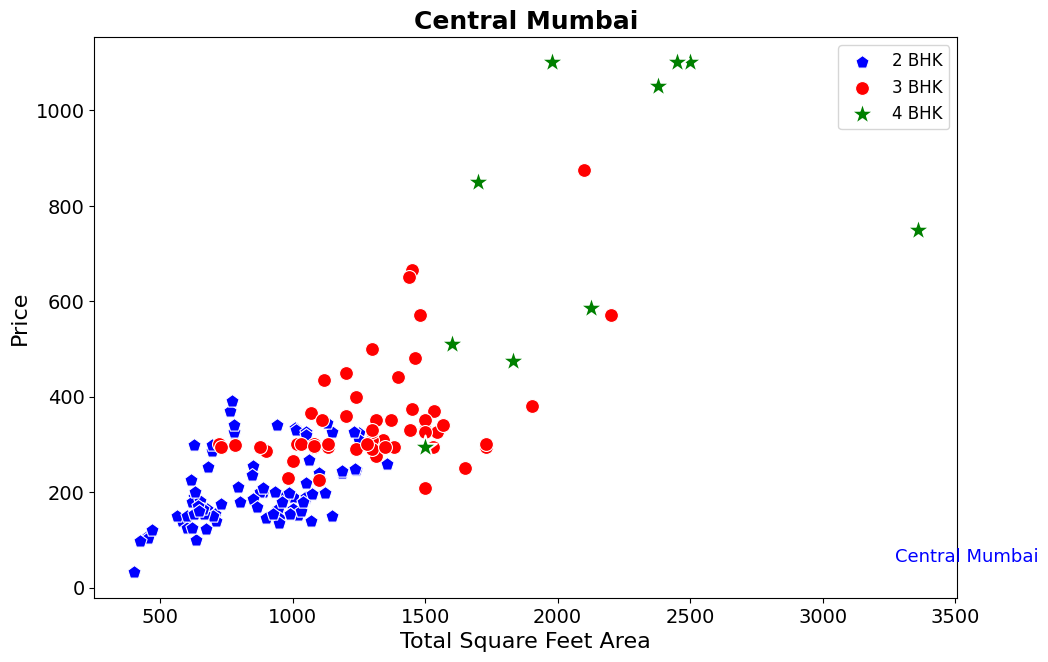

In [116]:
plot_scatter_chart1(df,"Central Mumbai")

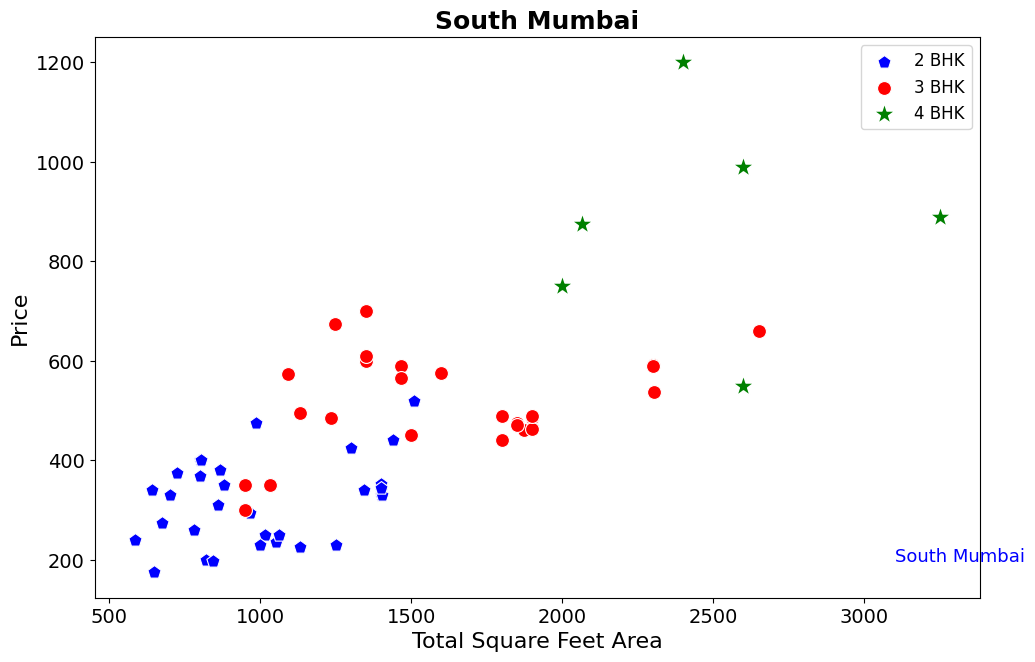

In [117]:
plot_scatter_chart1(df,"South Mumbai")

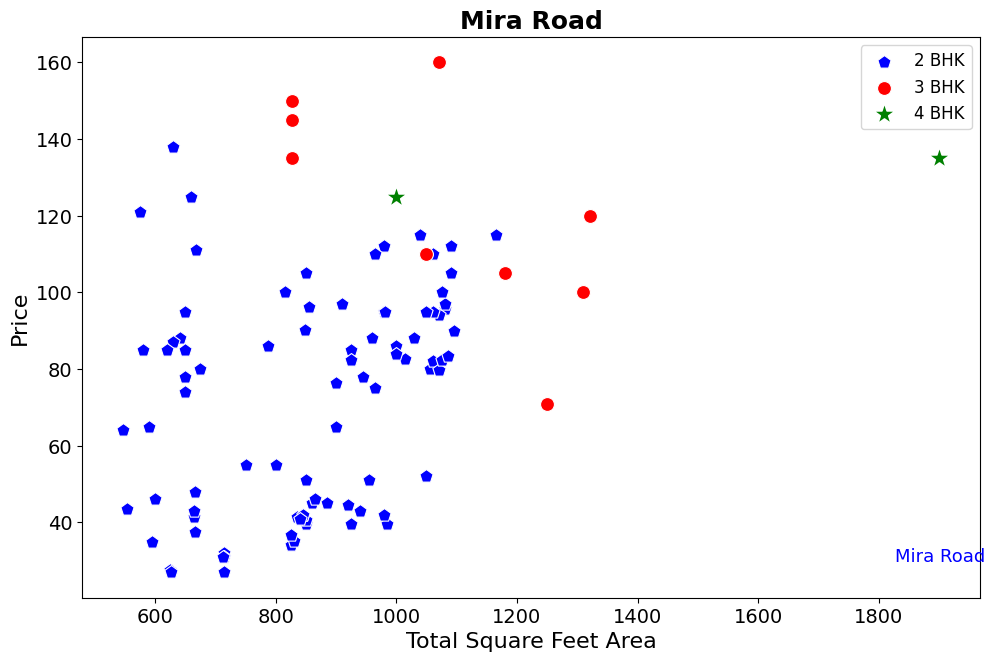

In [118]:
plot_scatter_chart1(df,"Mira Road")

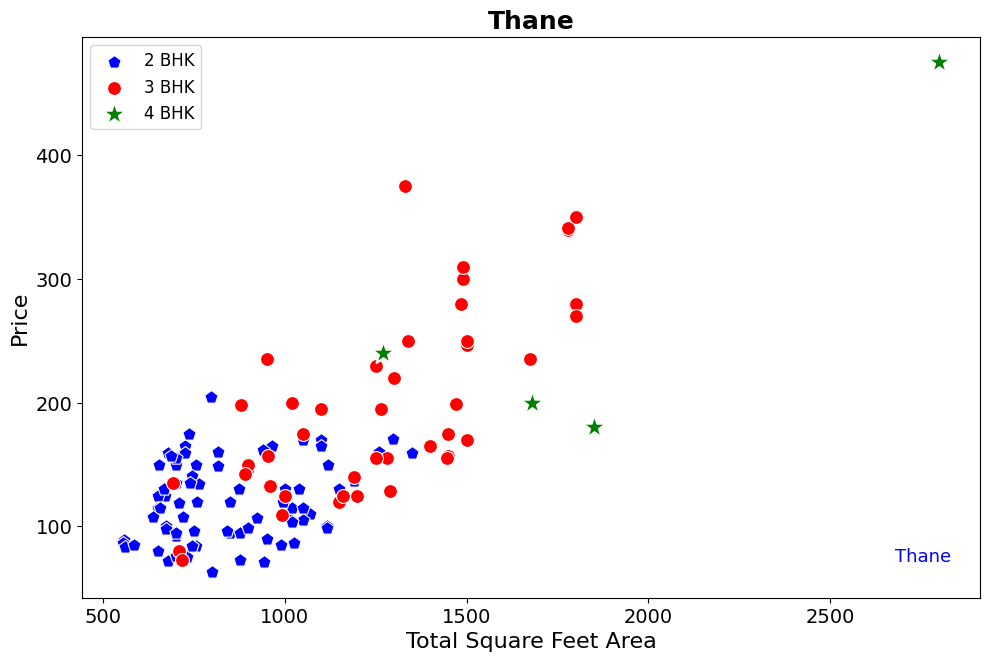

In [119]:
plot_scatter_chart1(df,"Thane")

## 12. Location Map (Geocoders)

In [129]:
df = pd.read_csv('Map_Location.csv')

lat   = list(df['Latitude'])
lon   = list(df['Longitude'])
name  = list(df['Property_Name'])
add   = list(df['Location'])
price = list(df['USD'])
age   = list(df['Property_Age'])
avail = list(df['Availability'])
rate  = list(df['Rate_SqFt'])

gmap  = folium.Map(location=[19.15940, 73.07068], zoom_start=11)
fg    = folium.FeatureGroup(name="My Map").add_to(gmap)

In [130]:
for lat,lon,name,add,price,age,avail,rate in zip(lat,lon,name,add,price,age,avail,rate):
    html = f"""<p style="color:green" > Property Name : {name}<p/>
               <p style="color:green" > Address : {add}<p/>
               <p style="color:red" > Price(USD) : {price}<p/>
               <p style="color:red" > Rate per SqFt : {rate}<p/>
               <p style="color:blue" > Property Age : {age}<p/>
               <p style="color:blue" > Availability : {avail}<p/>
            """
    iframe = folium.IFrame(html, width=250, height=270)
    popup  = folium.Popup(iframe, max_width=300)
    marker = folium.Marker([lat,lon], popup=(popup)).add_to(gmap)
    gmap.add_child(marker)

gmap.add_child(fg)
#gmap.save("mumbai_property.html")

# The End !!